[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [2]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [5]:
import os

# 1. เตรียมโปรเจกต์
%cd /content
if not os.path.exists('SadTalker'):
    !git clone https://github.com/Winfredy/SadTalker
%cd SadTalker

# 2. ล้างการล็อกเวอร์ชันที่ขัดกับ Python 3.12 ออกให้หมด (Scipy, Numpy, Basicsr ฯลฯ)
!sed -i 's/==/>=/g' requirements.txt
!sed -i '/scipy/d' requirements.txt
!sed -i '/numpy/d' requirements.txt
!sed -i '/basicsr/d' requirements.txt
!sed -i '/facexlib/d' requirements.txt
!sed -i '/gfpgan/d' requirements.txt

# 3. ติดตั้ง Library พื้นฐานเวอร์ชันล่าสุดที่รองรับ Python 3.12
!pip install --no-cache-dir scipy numpy basicsr facexlib gfpgan filterpy

# 4. ติดตั้ง Library เสริมตัวอื่นๆ
!pip install --no-cache-dir tqdm pooch yacs resampy imageio-ffmpeg

# 5. ติดตั้งส่วนที่เหลือจาก requirements.txt (ที่ถูกแก้แล้ว)
!pip install -r requirements.txt

# 6. ดาวน์โหลด Model (AI จะทำงานไม่ได้ถ้าไม่มีตัวนี้)
!bash scripts/download_models.sh

print("\n✅ ติดตั้งสำเร็จ! Scipy และ Library อื่นๆ พร้อมใช้งานบน Python 3.12 แล้วครับ")

/content
/content/SadTalker
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 86.4 MB/s eta 0:00:00
mkdir: cannot create directory ‘./checkpoints’: File exists
File ‘./checkpoints/mapping_00109-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/mapping_00229-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_256.safetensors’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_512.safetensors’ already there; not retrieving.
File ‘./gfpgan/weights/alignment_WFLW_4HG.pth’ already there; not retrieving.
File ‘./gfpgan/weights/detection_Resnet50_Final.pth’ already there; not retrieving.
File ‘./gfpgan/weights/GFPGANv1.4.pth’ already there; not retrieving.
File ‘./gfpgan/weights/parsing_parsenet.

Download models (1 mins)

In [6]:

!pip install dlib-bin

print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.8 MB/s eta 0:00:00
Download pre-trained models...
--2026-01-21 07:21:36--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-21T08%3A04%3A10Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-21T07%3A03%3A16Z&ske=2026-01-21T08%3A04%3A10Z&sks=b&skv=2018-11-09&sig=lxSYTaZ5JKUx1dbSnDwGhfXQOsXhchPDwtwoByTPFEs%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

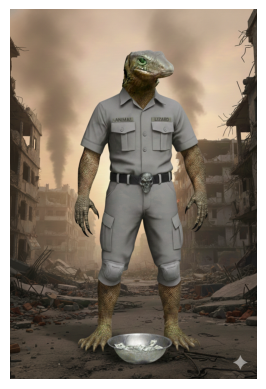

In [7]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/xxx.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/xxx.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [28]:
# 1. เข้าโฟลเดอร์โปรเจกต์
%cd /content/SadTalker

# 2. แก้ไขไฟล์ preprocess.py (เปลี่ยนการสร้าง array ให้รองรับ Numpy รุ่นใหม่)
# เราจะบังคับให้มันใช้ dtype=object เพื่อแก้ปัญหา inhomogeneous shape
!sed -i "s/trans_params = np.array(\[w0, h0, s, t\[0\], t\[1\]\])/trans_params = np.array(\[w0, h0, s, t\[0\], t\[1\]\], dtype='object')/g" src/face3d/util/preprocess.py

print("✅ แก้ไขจุดสุดท้ายเรียบร้อย! คราวนี้น่าจะรันผ่านยาวจนจบแล้วครับ")

/content/SadTalker
✅ แก้ไขจุดสุดท้ายเรียบร้อย! คราวนี้น่าจะรันผ่านยาวจนจบแล้วครับ


In [36]:
import os

# Path ไฟล์เดิมของคุณ
source_image = '/content/SadTalker/examples/source_image/xxx.png'
driven_audio = '/content/SadTalker/examples/driven_audio/yyy.mp3'
result_dir = '/content/SadTalker/results'

if not os.path.exists(result_dir): os.makedirs(result_dir)

print("🚀 พยายามตรวจจับใบหน้าใหม่อีกครั้งด้วยโหมด Crop...")

# เปลี่ยน --preprocess เป็น crop เพื่อให้ AI โฟกัสใบหน้าได้แม่นยำขึ้น
!python inference.py --driven_audio {driven_audio} \
    --source_image {source_image} \
    --result_dir {result_dir} \
    --still \
    --preprocess resize \
    --enhancer gfpgan

🚀 พยายามตรวจจับใบหน้าใหม่อีกครั้งด้วยโหมด Crop...
using safetensor as default
3DMM Extraction for source image
landmark Det::   0% 0/1 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/content/SadTalker/inference.py", line 144, in <module>
    main(args)
  File "/content/SadTalker/inference.py", line 46, in main
    first_coeff_path, crop_pic_path, crop_info =  preprocess_model.generate(pic_path, first_frame_dir, args.preprocess,\
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/SadTalker/src/utils/preprocess.py", line 124, in generate
    lm = self.propress.predictor.extract_keypoint(frames_pil, landmarks_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/SadTalker/src/face3d/extract_kp_videos_safe.py", line 57, in extract_keypoint
    current_kp = self.extract_keypoint(image)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/conten

In [31]:
import os
import glob
from google.colab import files

# 1. ค้นหาไฟล์วิดีโอล่าสุดที่ AI สร้างขึ้น
result_path = '/content/SadTalker/results/*.mp4'
list_of_files = glob.glob(result_path)

if list_of_files:
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"✅ เจอไฟล์แล้ว: {latest_file}")

    # 2. แปลงไฟล์ด้วย ffmpeg เพื่อให้เล่นได้บนมือถือและคอมพิวเตอร์ทุกเครื่อง
    output_file = "/content/talking_avatar_final.mp4"
    !ffmpeg -y -i {latest_file} -vcodec libx264 -f mp4 {output_file}

    print("🎬 แปลงไฟล์เสร็จแล้ว! กำลังเตรียมการดาวน์โหลด...")
    files.download(output_file)
else:
    print("❌ ไม่พบไฟล์วิดีโอในโฟลเดอร์ results กรุณาลองเช็ค Path อีกครั้ง")

✅ เจอไฟล์แล้ว: /content/SadTalker/results/2026_01_21_07.53.48.mp4
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>